This notebook provides a brief overview of how to quickly visualize geospatial data using the GeoPandas library.

First I import the necessary libraries:

- GeoPandas will allow us to read in "ShapeFiles", which are datasets containing a column called geometry. This field contains of polygons that will allow us to place the location of each given row onto a map.
- Pandas will be handy to help read population data contained in a excel workbook.
- Finally, MatPlotLib's pyplot will be used to visualize the data on a map.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Now I read in each dataset with GeoPandas and Pandas:

In [2]:
alabama_earthquake = gpd.read_file('Earthquakes_AL_2019-03-13.shp')
alabama_landslides = gpd.read_file('ALHistoricLandslides.shp')
df = pd.read_excel('PopulationEstimates.xlsx')
us_states = gpd.read_file('us_states.shp')

To verify GeoPandas worked, we can check the type of the object I now have.

In [3]:
print(type(us_states))

<class 'geopandas.geodataframe.GeoDataFrame'>


All of the data can be found in the repository, but here are their original sources. They were all obtained during the weeks of October 25th and November 1st of 2021. 
- The Alabama water data can be found at the following website: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Water
- The Alabama earthquake data can be found at the following website: https://www.gsa.state.al.us/gsa/geologic/hazards/earthquakes
- The Alabama landslide data can be found at the following website: https://www.gsa.state.al.us/gsa/geologic/geospatial
- The population data can be found at the following website: https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
    - This population data was downloaded and edited prior to being loaded into Python. 
- The United States data can be found at the following website: https://drive.google.com/drive/folders/1qitXmKpVo8_qpFtLDYxAzc_tihShCYrK (Accessed via the GeoDelta Labs YouTube channel)

Here I merge the population Dataframe, named "df", and the United States GeoDataframe, named "us_states". I proceed to remove Hawaii and Alaska from the list to focus solely on the contiguous United States.

In [4]:
us_states.rename(columns = {'NAME_1' : 'State'}, inplace = True)
us_states = us_states.merge(df, on = 'State')
us_48states = us_states[us_states.State != 'Alaska']
us_48states = us_48states[us_48states.State != 'Hawaii']

GeoDataframes act very similar to regular Pandas Dataframes. You can perform standard Dataframe functions on them. Here I perform a head() call to show the top five rows. The geometry column is what makes this a GeoDataframe: it contains coordinate information that will map the visual to the appropriate latitude and longitude positions. This head() call also shows that the population information has been added onto us_states correctly.

In [5]:
us_states.head()

,State,geometry,1990,2000,2010,2020
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ...",4040389,4447207,4779736,5024279
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125...",550043,626933,710231,733391
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0...",3665339,5130247,6392017,7151502
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496...",2350624,2673293,2915918,3011524
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330...",29811427,33871653,37253956,39538223


Just like calling head(), you can call plot() on a GeoDataframe and it will perform the same as a regular Dataframe. Here I display the 2020 population density of each state in a red (most populated) to blue (least populated) scale.

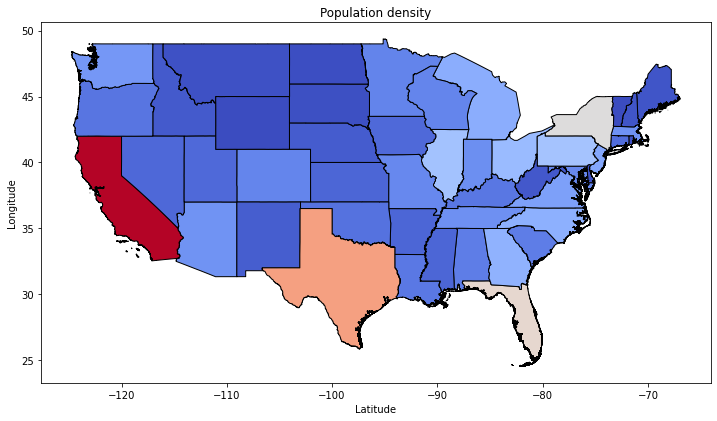

In [6]:
us_48states.plot(cmap = 'coolwarm', column = 2020, figsize = (12, 12), edgecolor = 'black')
plt.title('Population density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Visualizing multiple GeoSpacial datasets at once can yield some interesting findings. I acquired a dataset on Alabama Earthquakes and Landslides to see if there was any correlation. Just for fun, I also divide up the earthquake dataset by the year 2000.

In [7]:
alabama = us_states[us_states.State == 'Alabama']
alabama_earthquake_pre2000 = alabama_earthquake[alabama_earthquake['Year'] < 2000]
alabama_earthquake_post2000 = alabama_earthquake[alabama_earthquake['Year'] >= 2000]

One interesting wrinkle in working with Geospatial data is that not all datasets are stored with the same coordinate reference system (crs) code. The crs tells the program using the data how the data should be placed on the map in in the context of the entire world as referenced by that specific crs. Mapping datasets with difference crs codes will not work - to map datasets together, GeoPandas provides this great function called to_crs() which will change the underlying data to the crs needed. In this context, I convert the landslide data to the same crs as the us_state data. I then drop any null value - this will help avoid any instance when a value is missing in the geography column.

In [8]:
alabama_landslides.to_crs(4326, inplace = True)
alabama_landslides.dropna(inplace = True)

Next I plot the Alabama GeoDrataframe and place my two separate earthquake GeoDataframes on top of it. I was unhappy with the size of the Earthquake locations, so I increased the magnitude of their size by raising the Dataframes Magnitude value by 3.5. As expected, no significant difference in size of location based on the 2000 year division.

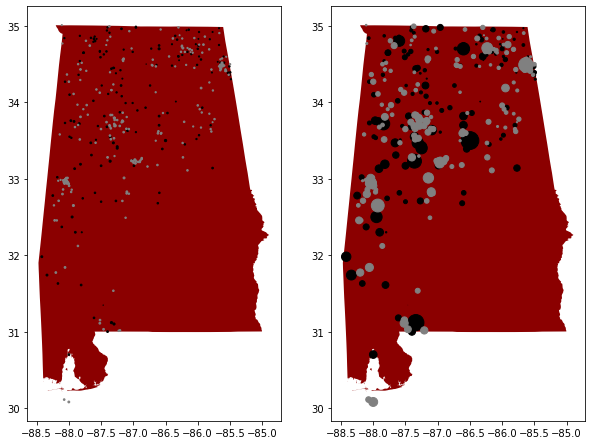

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 10))
alabama.plot(ax = ax1, color = 'darkred')
alabama.plot(ax = ax2, color = 'darkred')
alabama_earthquake_pre2000.plot(ax = ax1, color = 'black', markersize = alabama_earthquake_pre2000.Magnitude)
alabama_earthquake_post2000.plot(ax = ax1, color = 'grey', markersize = alabama_earthquake_post2000.Magnitude)
alabama_earthquake_pre2000.plot(ax = ax2, color = 'black', markersize = alabama_earthquake_pre2000.Magnitude ** 3.5)
alabama_earthquake_post2000.plot(ax = ax2, color = 'grey', markersize = alabama_earthquake_post2000.Magnitude ** 3.5);

Curious if the landslide data correlated with earthquakes, I then decided to place one final layer on top of the map: a yellow landslide layer. As expected, a lot of landslides did indeed occur around the epicenter of the larger quakes.

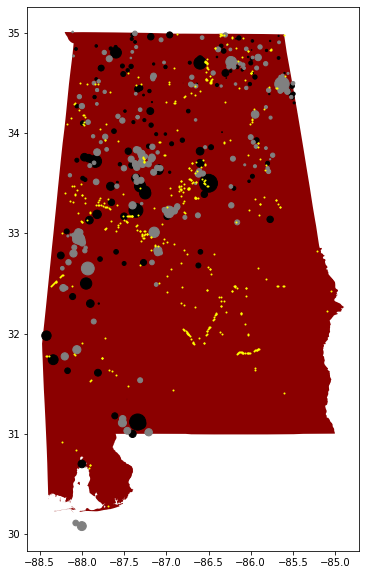

In [10]:
fig, ax = plt.subplots(figsize = (10, 10))
alabama.plot(ax = ax, color = 'darkred')
alabama_earthquake_pre2000.plot(ax = ax, color = 'black', markersize = alabama_earthquake_pre2000.Magnitude ** 3.5)
alabama_earthquake_post2000.plot(ax = ax, color = 'grey', markersize = alabama_earthquake_post2000.Magnitude ** 3.5)
alabama_landslides.plot(ax = ax, color = 'Yellow', markersize = 1);

Another great function with GeoDatagrames is the ability to overlay(). In this instance, I am overlaying on a union, which brings the two GeoDataframes together. In this instance, I am bringing together geospatial information of Alabama and geospatial information of Alabama water districts. (For this demonstration, I'm only bringing together three separate districts - the more I put on, the longer it was taking. Three districts alone will take several minutes for this to execute.) As above, I need to change each water district GeoDataframe to the correct crs. Notice, also, how easy is it to add GeoDataframes together - it's simply a call to append(). I finally call plot() on the unionid GeoDataframe to produce a single image.

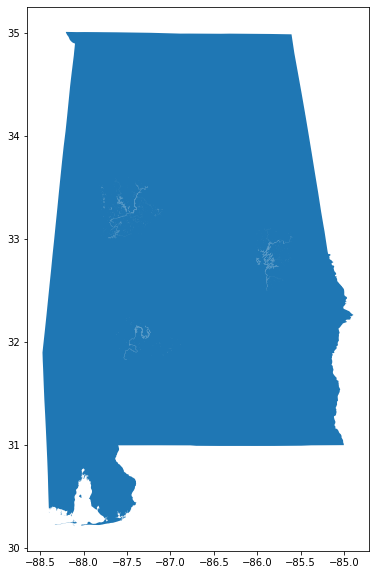

In [11]:
district_water = gpd.read_file('alabama_water/tl_2021_01123_areawater.shp')
district_water.to_crs(4326, inplace = True)    

for item in [125, 131]:
    more_district_water = gpd.read_file(f'alabama_water/tl_2021_01{item}_areawater.shp')
    more_district_water.to_crs(4326, inplace = True)
    district_water = district_water.append(more_district_water)

alabama_with_water = alabama.overlay(district_water, how = 'union')

alabama_with_water.plot(figsize = (10, 10))
plt.show()

Cleaning up the map, we can see more clearly the outline of the water in these three districts:

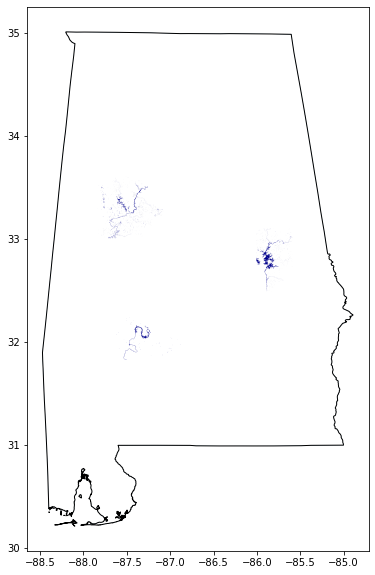

In [12]:
ax = alabama_with_water.plot(figsize = (10, 10))
alabama.plot(ax = ax, color = 'white', edgecolor = 'black')
district_water.plot(ax = ax, color = 'darkblue')
plt.show()